In [1]:
import os
import tensorflow as tf
tf.enable_eager_execution()
assert(tf.executing_eagerly)
import sys
sys.path.append("../")
from dataset_utils.tf_data_loader import ImageInputPipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Analyze Ferritic steel dataset

## Analyze train dataset

In [51]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images"
train_rel_map = {"images": "train", "labels": "label"}
assert(os.path.isdir(base_dir))

In [52]:
train_input_pipeline = ImageInputPipeline(train_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  3940


In [53]:
size = (256, 256)
num_pix_img = size[0] * size[1]
train_ds = train_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

0.115966796875


<IPython.core.display.Javascript object>


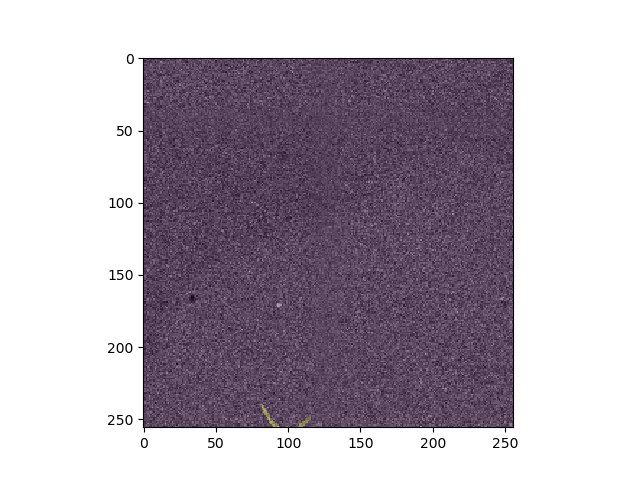

<IPython.core.display.Javascript object>


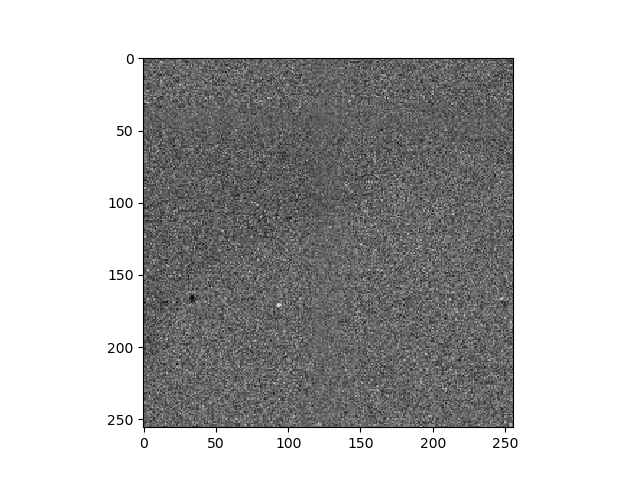

In [21]:
%matplotlib notebook
for img, mask in train_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [12]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in train_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [14]:
train_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
train_df.head()

,#pix_crack,#pix_ext
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,15331.0


In [15]:
train_df["%pix_crack"] = np.where(pd.notna(train_df["#pix_crack"]), 100 * train_df["#pix_crack"]/num_pix_img, 0)
train_df["%pix_crack_na"] = 100 * train_df["#pix_crack"]/num_pix_img
train_df["%pix_ext"] = np.where(pd.notna(train_df["#pix_ext"]), 100 * train_df["#pix_ext"]/num_pix_img, 0)
train_df["%pix_ext_na"] = 100 * train_df["#pix_ext"]/num_pix_img
train_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,NaN,0.0,NaN,0.00000,NaN
1,NaN,NaN,0.0,NaN,0.00000,NaN
2,NaN,NaN,0.0,NaN,0.00000,NaN
3,NaN,NaN,0.0,NaN,0.00000,NaN
4,NaN,15331.0,0.0,NaN,23.39325,23.39325


The summary below shows that:

- Percentage of pixels with crack in the dataset is 0.06%
- Out of 3940 images, only 211 has crack in it
- If only images with cracks are considered, then the percentage of pixels with crack is 1.21%
- --
- Percentage of pixels with extrusion in the dataset is 2.34%
- Out of 3940 images, only 1328 has extrusion in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 6.95%

In [16]:
train_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,211.000000,1328.000000,3940.000000,211.000000,3940.000000,1328.000000
mean,795.180095,4557.408886,0.064979,1.213349,2.343905,6.954054
std,1651.915761,7140.641838,0.642935,2.520623,7.127617,10.895755
min,2.000000,1.000000,0.000000,0.003052,0.000000,0.001526
25%,44.500000,399.750000,0.000000,0.067902,0.000000,0.609970
50%,156.000000,1636.500000,0.000000,0.238037,0.000000,2.497101
75%,605.500000,5739.250000,0.000000,0.923920,0.629807,8.757401
max,8378.000000,53214.000000,12.783813,12.783813,81.198120,81.198120


The histogram below shows that 80% of the images with cracks have percentage of cracks in it in the range from 0 to 1.15%

<IPython.core.display.Javascript object>


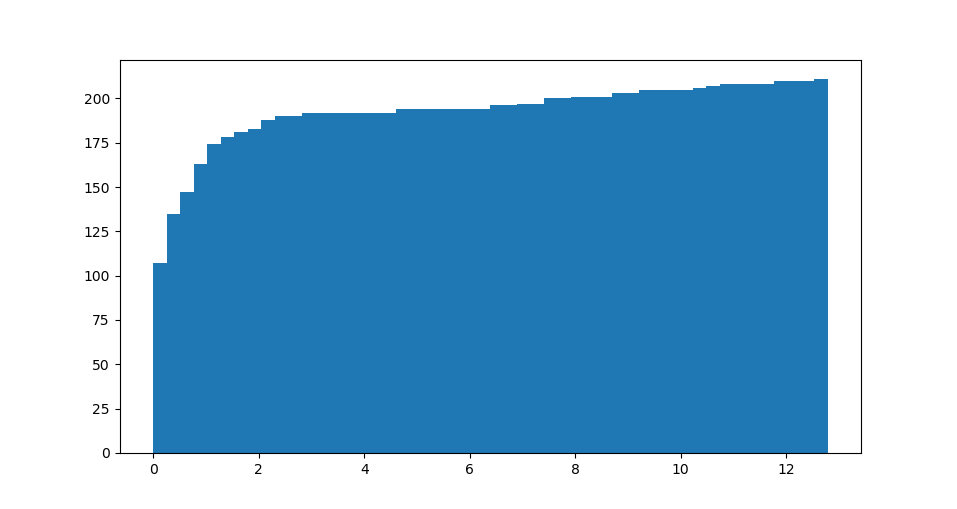

(array([107., 135., 147., 163., 174., 178., 181., 183., 188., 190., 190.,
        192., 192., 192., 192., 192., 192., 192., 194., 194., 194., 194.,
        194., 194., 194., 196., 196., 197., 197., 200., 200., 201., 201.,
        201., 203., 203., 205., 205., 205., 205., 206., 207., 208., 208.,
        208., 208., 210., 210., 210., 211.]),
 array([3.05175781e-03, 2.58666992e-01, 5.14282227e-01, 7.69897461e-01,
        1.02551270e+00, 1.28112793e+00, 1.53674316e+00, 1.79235840e+00,
        2.04797363e+00, 2.30358887e+00, 2.55920410e+00, 2.81481934e+00,
        3.07043457e+00, 3.32604980e+00, 3.58166504e+00, 3.83728027e+00,
        4.09289551e+00, 4.34851074e+00, 4.60412598e+00, 4.85974121e+00,
        5.11535645e+00, 5.37097168e+00, 5.62658691e+00, 5.88220215e+00,
        6.13781738e+00, 6.39343262e+00, 6.64904785e+00, 6.90466309e+00,
        7.16027832e+00, 7.41589355e+00, 7.67150879e+00, 7.92712402e+00,
        8.18273926e+00, 8.43835449e+00, 8.69396973e+00, 8.94958496e+00,
        9.

In [55]:
%matplotlib notebook
plt.hist(train_df["%pix_crack_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 1.15 % image area for crack

<IPython.core.display.Javascript object>


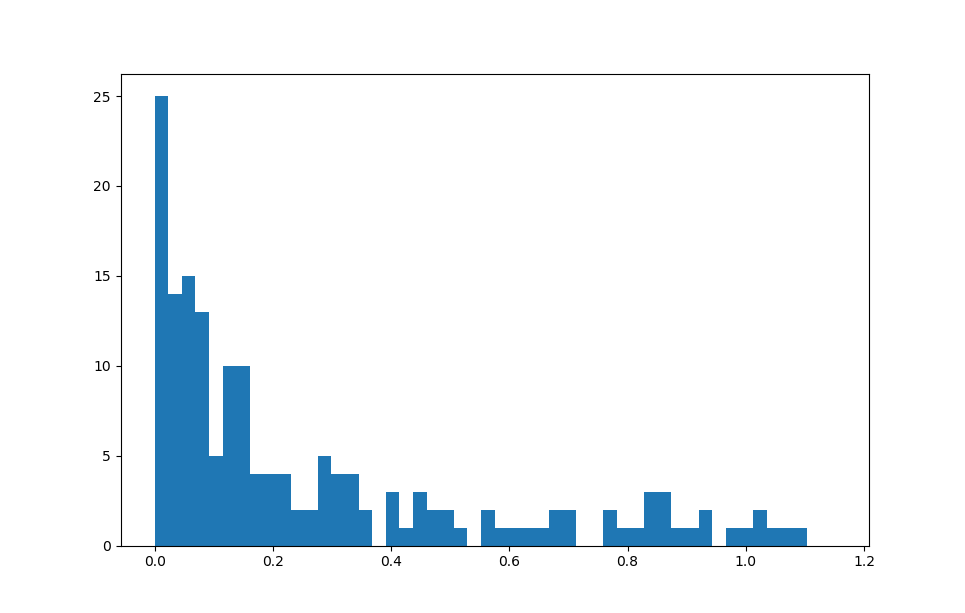

(array([25., 14., 15., 13.,  5., 10., 10.,  4.,  4.,  4.,  2.,  2.,  5.,
         4.,  4.,  2.,  0.,  3.,  1.,  3.,  2.,  2.,  1.,  0.,  2.,  1.,
         1.,  1.,  1.,  2.,  2.,  0.,  0.,  2.,  1.,  1.,  3.,  3.,  1.,
         1.,  2.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,  0.,  0.]),
 array([0.   , 0.023, 0.046, 0.069, 0.092, 0.115, 0.138, 0.161, 0.184,
        0.207, 0.23 , 0.253, 0.276, 0.299, 0.322, 0.345, 0.368, 0.391,
        0.414, 0.437, 0.46 , 0.483, 0.506, 0.529, 0.552, 0.575, 0.598,
        0.621, 0.644, 0.667, 0.69 , 0.713, 0.736, 0.759, 0.782, 0.805,
        0.828, 0.851, 0.874, 0.897, 0.92 , 0.943, 0.966, 0.989, 1.012,
        1.035, 1.058, 1.081, 1.104, 1.127, 1.15 ]),
 <a list of 50 Patch objects>)

In [57]:
%matplotlib notebook
plt.hist(train_df["%pix_crack_na"], bins=50, cumulative=False, range=(0,1.15))

The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 10.75 %

<IPython.core.display.Javascript object>


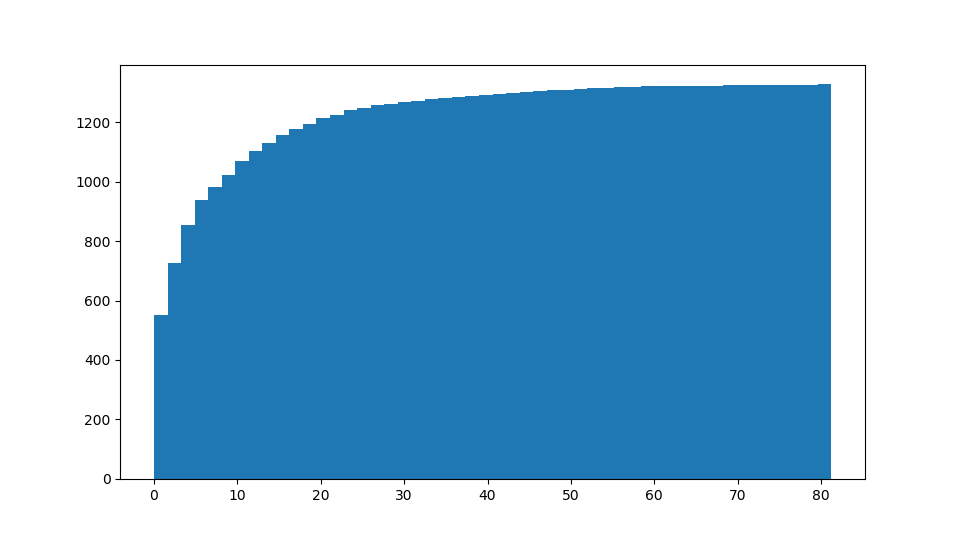

(array([ 552.,  725.,  856.,  938.,  981., 1023., 1070., 1103., 1130.,
        1157., 1176., 1196., 1213., 1226., 1242., 1248., 1257., 1262.,
        1268., 1271., 1277., 1282., 1285., 1288., 1292., 1296., 1299.,
        1301., 1305., 1309., 1310., 1313., 1316., 1317., 1319., 1319.,
        1321., 1323., 1323., 1323., 1323., 1323., 1324., 1324., 1326.,
        1327., 1327., 1327., 1327., 1328.]),
 array([1.52587891e-03, 1.62545776e+00, 3.24938965e+00, 4.87332153e+00,
        6.49725342e+00, 8.12118530e+00, 9.74511719e+00, 1.13690491e+01,
        1.29929810e+01, 1.46169128e+01, 1.62408447e+01, 1.78647766e+01,
        1.94887085e+01, 2.11126404e+01, 2.27365723e+01, 2.43605042e+01,
        2.59844360e+01, 2.76083679e+01, 2.92322998e+01, 3.08562317e+01,
        3.24801636e+01, 3.41040955e+01, 3.57280273e+01, 3.73519592e+01,
        3.89758911e+01, 4.05998230e+01, 4.22237549e+01, 4.38476868e+01,
        4.54716187e+01, 4.70955505e+01, 4.87194824e+01, 5.03434143e+01,
        5.19673462e+01, 

In [59]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 10.75% image area for extrusions

<IPython.core.display.Javascript object>


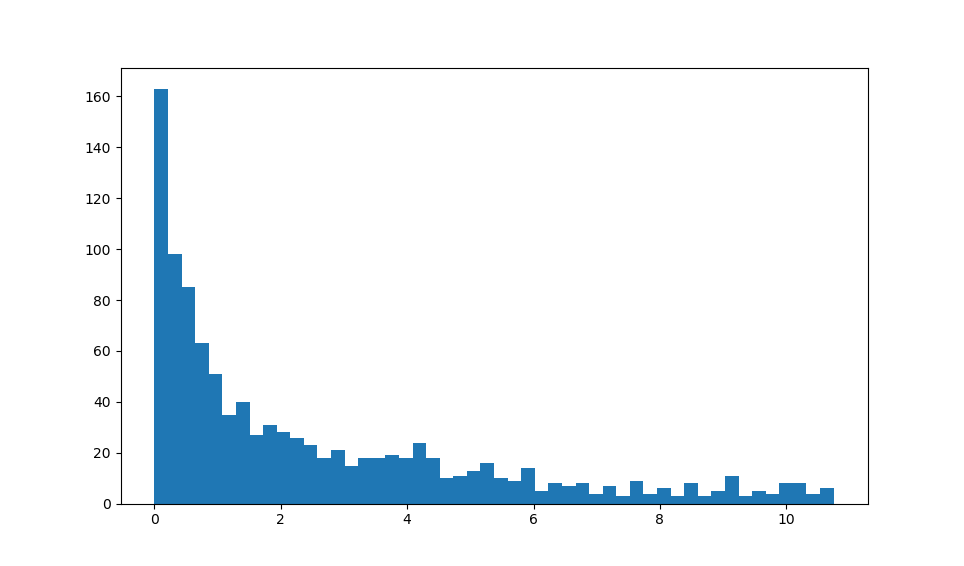

(array([163.,  98.,  85.,  63.,  51.,  35.,  40.,  27.,  31.,  28.,  26.,
         23.,  18.,  21.,  15.,  18.,  18.,  19.,  18.,  24.,  18.,  10.,
         11.,  13.,  16.,  10.,   9.,  14.,   5.,   8.,   7.,   8.,   4.,
          7.,   3.,   9.,   4.,   6.,   3.,   8.,   3.,   5.,  11.,   3.,
          5.,   4.,   8.,   8.,   4.,   6.]),
 array([ 0.   ,  0.215,  0.43 ,  0.645,  0.86 ,  1.075,  1.29 ,  1.505,
         1.72 ,  1.935,  2.15 ,  2.365,  2.58 ,  2.795,  3.01 ,  3.225,
         3.44 ,  3.655,  3.87 ,  4.085,  4.3  ,  4.515,  4.73 ,  4.945,
         5.16 ,  5.375,  5.59 ,  5.805,  6.02 ,  6.235,  6.45 ,  6.665,
         6.88 ,  7.095,  7.31 ,  7.525,  7.74 ,  7.955,  8.17 ,  8.385,
         8.6  ,  8.815,  9.03 ,  9.245,  9.46 ,  9.675,  9.89 , 10.105,
        10.32 , 10.535, 10.75 ]),
 <a list of 50 Patch objects>)

In [61]:
%matplotlib notebook
plt.hist(train_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,10.75))

## Analyze test dataset

In [24]:
base_dir = "/mnt/sda/deep_learning/CSE527_FinalProject-master/images"
test_rel_map = {"images": "test", "labels": "test_label"}
assert(os.path.isdir(base_dir))

In [25]:
test_input_pipeline = ImageInputPipeline(test_rel_map, ".tif", base_dir, shuffle=False)

Number of examples in dataset:  860


In [26]:
size = (256, 256)
num_pix_img = size[0] * size[1]
test_ds = test_input_pipeline._input_fn(size=size, batch_size=1, augment=False)

An example of how an image with defect area between 0.1% and 0.14% looks like:

0.103759765625


<IPython.core.display.Javascript object>


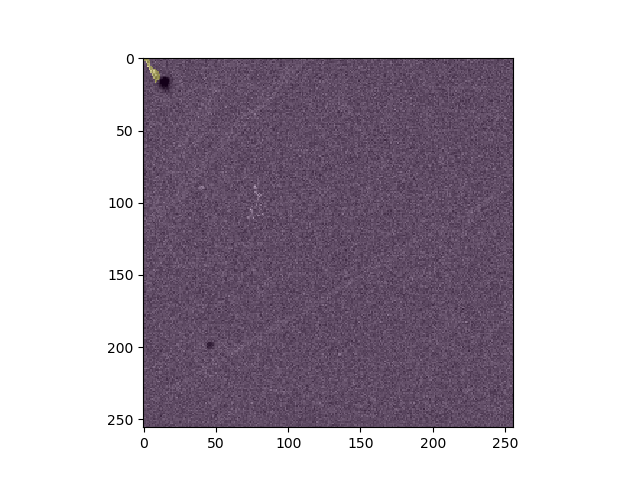

<IPython.core.display.Javascript object>


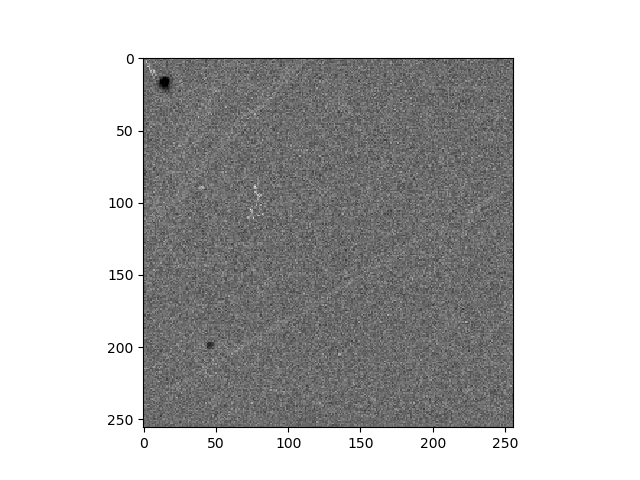

In [27]:
%matplotlib notebook
for img, mask in test_ds:
    if (mask>0).numpy().sum() > 0:
        percent_defect = 100*((mask.numpy()>0).sum())/num_pix_img
        if percent_defect > 0.1 and percent_defect < 0.14:
            print(percent_defect)
            plt.imshow(img[0,...,0], cmap="gray")
            plt.imshow(mask[0,...,0], alpha=0.3)
            plt.figure()
            plt.imshow(img[0,...,0], cmap="gray")
            break

In [28]:
pix_sum_crack = []
pix_sum_ext = []
for img, mask in test_ds:
    pix_sum_crack.append((mask.numpy()==1).sum())
    pix_sum_ext.append((mask.numpy()==2).sum())

In [29]:
test_df = pd.DataFrame(zip(pix_sum_crack, pix_sum_ext), columns=("#pix_crack", "#pix_ext")).replace(0, np.nan)
test_df.head()

,#pix_crack,#pix_ext
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,122.0
4,NaN,NaN


In [30]:
test_df["%pix_crack"] = np.where(pd.notna(test_df["#pix_crack"]), 100 * test_df["#pix_crack"]/num_pix_img, 0)
test_df["%pix_crack_na"] = 100 * test_df["#pix_crack"]/num_pix_img
test_df["%pix_ext"] = np.where(pd.notna(test_df["#pix_ext"]), 100 * test_df["#pix_ext"]/num_pix_img, 0)
test_df["%pix_ext_na"] = 100 * test_df["#pix_ext"]/num_pix_img
test_df.head()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
0,NaN,NaN,0.0,NaN,0.000000,NaN
1,NaN,NaN,0.0,NaN,0.000000,NaN
2,NaN,NaN,0.0,NaN,0.000000,NaN
3,NaN,122.0,0.0,NaN,0.186157,0.186157
4,NaN,NaN,0.0,NaN,0.000000,NaN


The summary below shows that:

- Percentage of pixels with crack in the dataset is 0.09%
- Out of 860 images, only 60 have cracks in it
- If only images with cracks are considered, then the percentage of pixels with crack is 1.39%
- --
- Percentage of pixels with extrusion in the dataset is 2.21%
- Out of 860 images, only 295 have extrusions in it
- If only images with extrusions are considered, then the percentage of pixels with extrusion is 6.43%

In [31]:
test_df.describe()

,#pix_crack,#pix_ext,%pix_crack,%pix_crack_na,%pix_ext,%pix_ext_na
count,60.000000,295.000000,860.000000,60.000000,860.000000,295.000000
mean,909.966667,4216.142373,0.096872,1.388499,2.206779,6.433323
std,1947.407673,7254.907546,0.855420,2.971508,7.161059,11.070110
min,1.000000,3.000000,0.000000,0.001526,0.000000,0.004578
25%,35.750000,302.000000,0.000000,0.054550,0.000000,0.460815
50%,173.500000,1235.000000,0.000000,0.264740,0.000000,1.884460
75%,620.500000,5120.500000,0.000000,0.946808,0.547409,7.813263
max,8847.000000,49599.000000,13.499451,13.499451,75.682068,75.682068


The histogram below shows that 80% of the images with cracks have percentage of cracks in it in the range from 0 to 2

<IPython.core.display.Javascript object>


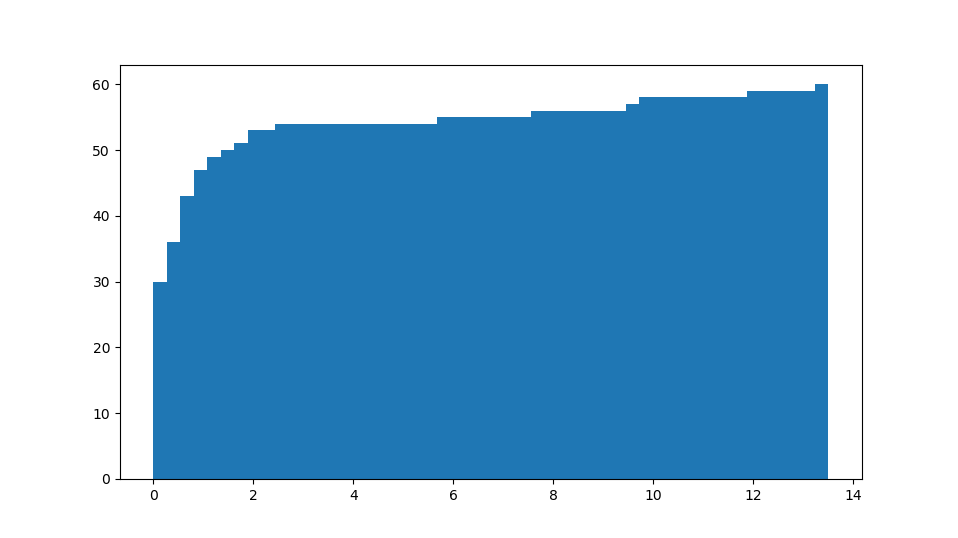

(array([30., 36., 43., 47., 49., 50., 51., 53., 53., 54., 54., 54., 54.,
        54., 54., 54., 54., 54., 54., 54., 54., 55., 55., 55., 55., 55.,
        55., 55., 56., 56., 56., 56., 56., 56., 56., 57., 58., 58., 58.,
        58., 58., 58., 58., 58., 59., 59., 59., 59., 59., 60.]),
 array([1.52587891e-03, 2.71484375e-01, 5.41442871e-01, 8.11401367e-01,
        1.08135986e+00, 1.35131836e+00, 1.62127686e+00, 1.89123535e+00,
        2.16119385e+00, 2.43115234e+00, 2.70111084e+00, 2.97106934e+00,
        3.24102783e+00, 3.51098633e+00, 3.78094482e+00, 4.05090332e+00,
        4.32086182e+00, 4.59082031e+00, 4.86077881e+00, 5.13073730e+00,
        5.40069580e+00, 5.67065430e+00, 5.94061279e+00, 6.21057129e+00,
        6.48052979e+00, 6.75048828e+00, 7.02044678e+00, 7.29040527e+00,
        7.56036377e+00, 7.83032227e+00, 8.10028076e+00, 8.37023926e+00,
        8.64019775e+00, 8.91015625e+00, 9.18011475e+00, 9.45007324e+00,
        9.72003174e+00, 9.98999023e+00, 1.02599487e+01, 1.05299072e+

In [44]:
%matplotlib notebook
plt.hist(test_df["%pix_crack_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 2 % image area for crack

<IPython.core.display.Javascript object>


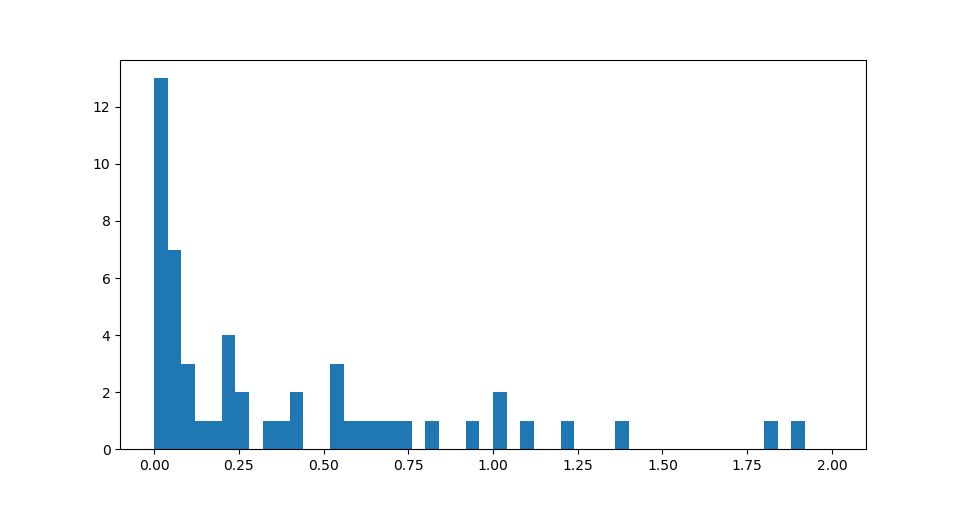

(array([13.,  7.,  3.,  1.,  1.,  4.,  2.,  0.,  1.,  1.,  2.,  0.,  0.,
         3.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <a list of 50 Patch objects>)

In [47]:
%matplotlib notebook
plt.hist(test_df["%pix_crack_na"], bins=50, cumulative=False, range=(0,2))

The histogram below shows that 80% of the images with extrusions have percentage of extrusion area in the image in the range from 0 to 10

<IPython.core.display.Javascript object>


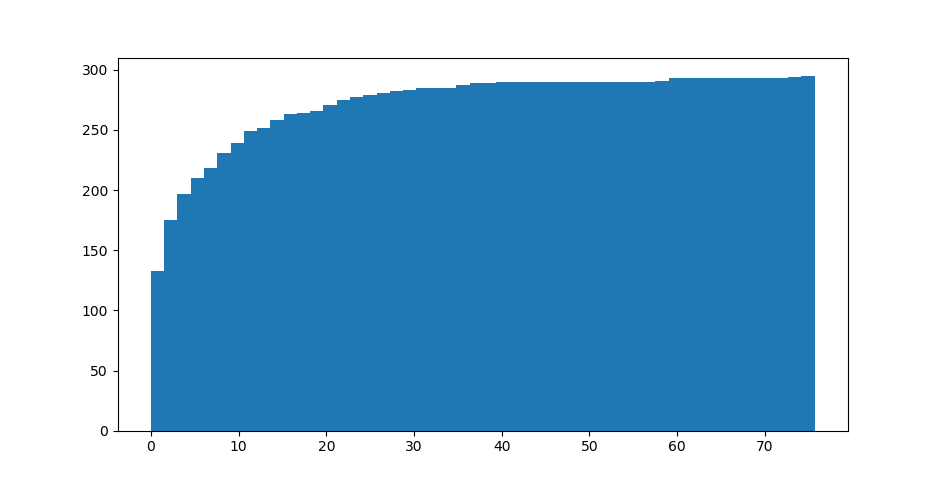

(array([133., 175., 197., 210., 218., 231., 239., 249., 252., 258., 263.,
        264., 266., 271., 275., 277., 279., 281., 282., 283., 285., 285.,
        285., 287., 289., 289., 290., 290., 290., 290., 290., 290., 290.,
        290., 290., 290., 290., 290., 291., 293., 293., 293., 293., 293.,
        293., 293., 293., 293., 294., 295.]),
 array([4.57763672e-03, 1.51812744e+00, 3.03167725e+00, 4.54522705e+00,
        6.05877686e+00, 7.57232666e+00, 9.08587646e+00, 1.05994263e+01,
        1.21129761e+01, 1.36265259e+01, 1.51400757e+01, 1.66536255e+01,
        1.81671753e+01, 1.96807251e+01, 2.11942749e+01, 2.27078247e+01,
        2.42213745e+01, 2.57349243e+01, 2.72484741e+01, 2.87620239e+01,
        3.02755737e+01, 3.17891235e+01, 3.33026733e+01, 3.48162231e+01,
        3.63297729e+01, 3.78433228e+01, 3.93568726e+01, 4.08704224e+01,
        4.23839722e+01, 4.38975220e+01, 4.54110718e+01, 4.69246216e+01,
        4.84381714e+01, 4.99517212e+01, 5.14652710e+01, 5.29788208e+01,
        5.

In [50]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=True)

Plotting histogram in the range 0 to 10 % image area for extrusions

<IPython.core.display.Javascript object>


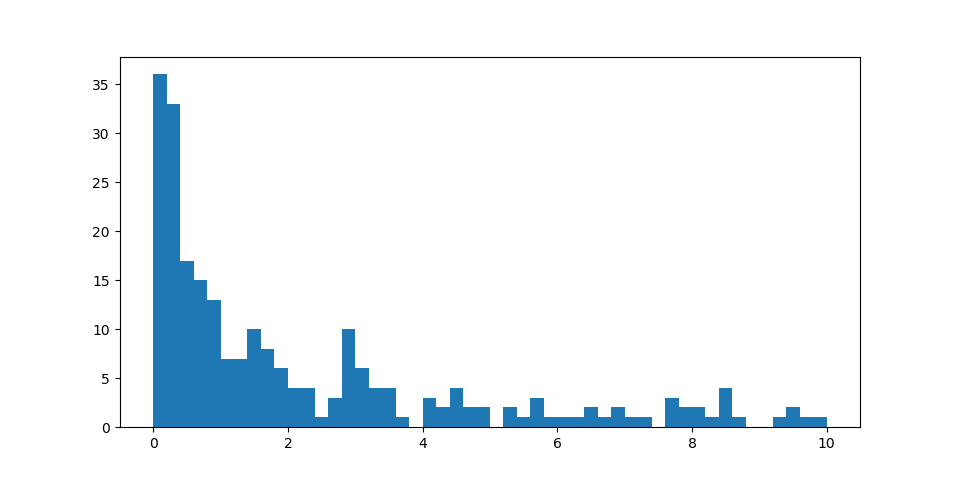

(array([36., 33., 17., 15., 13.,  7.,  7., 10.,  8.,  6.,  4.,  4.,  1.,
         3., 10.,  6.,  4.,  4.,  1.,  0.,  3.,  2.,  4.,  2.,  2.,  0.,
         2.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  0.,  3.,
         2.,  2.,  1.,  4.,  1.,  0.,  0.,  1.,  2.,  1.,  1.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

In [49]:
%matplotlib notebook
plt.hist(test_df["%pix_ext_na"], bins=50, cumulative=False, range=(0,10))